In [ ]:
""" Task 1: Exploratory Data Analysis (EDA)
1.Load the dataset and perform fundamental data exploration.
2.Utilize histograms, box plots, or density plots to understand feature distributions.
3.Investigate feature correlations to discern relationships within the data."""

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("Pharma_Industry.csv")

In [34]:
print(df.head())

   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [35]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [36]:
df.duplicated().sum()


np.int64(0)

In [37]:
df.shape

(500, 6)

In [38]:
print(df.describe())

       Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
count        500.000000                      500.000000        500.000000   
mean          -0.037761                        0.214957          0.062871   
std            0.979891                        1.247567          0.971978   
min           -3.019512                       -3.773897         -2.940389   
25%           -0.642003                       -0.565168         -0.648157   
50%           -0.019340                        0.201532          0.027732   
75%            0.641151                        0.951375          0.710774   
max            2.949094                        4.111751          3.193108   

       Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
count                  500.000000                   500.000000       500.0000  
mean                     0.054398                    -0.171863         0.5200  
std                      0.986001                     0.983765    

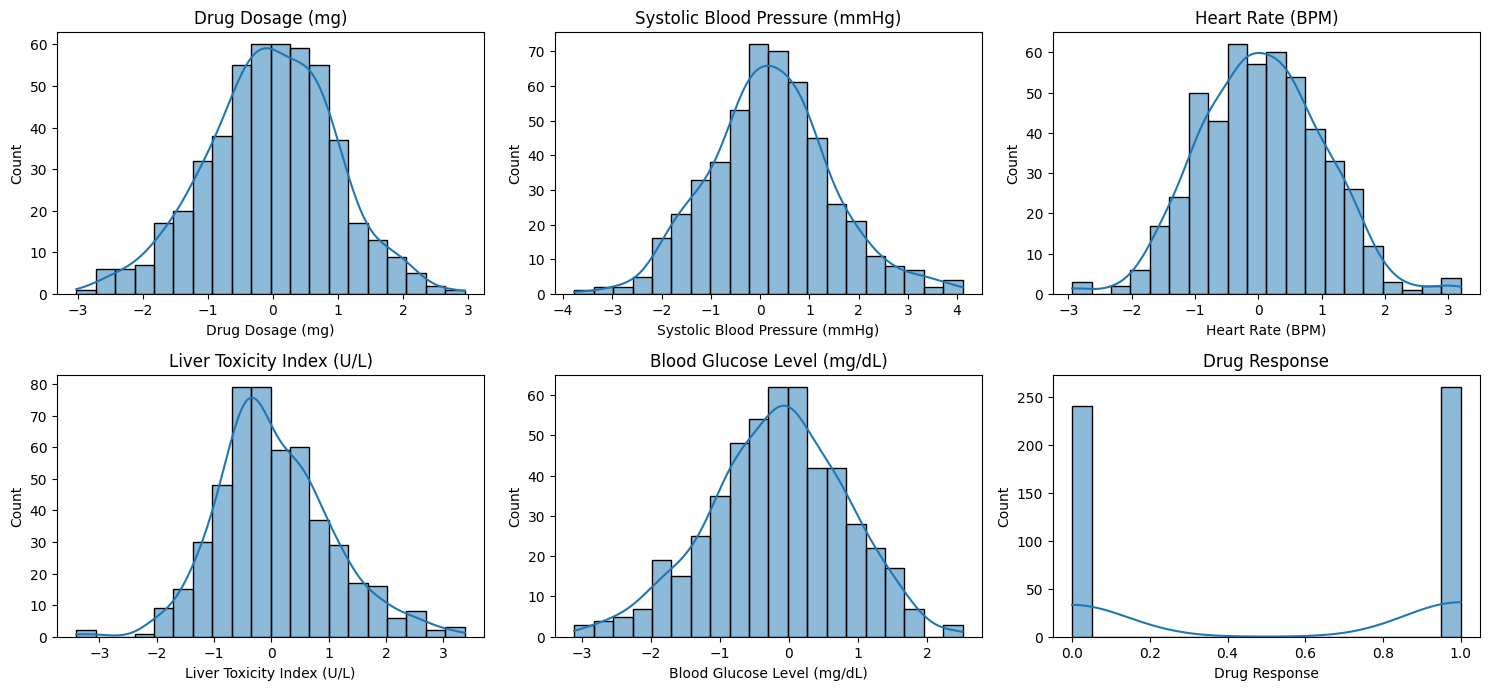

In [39]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # 3 per row
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()


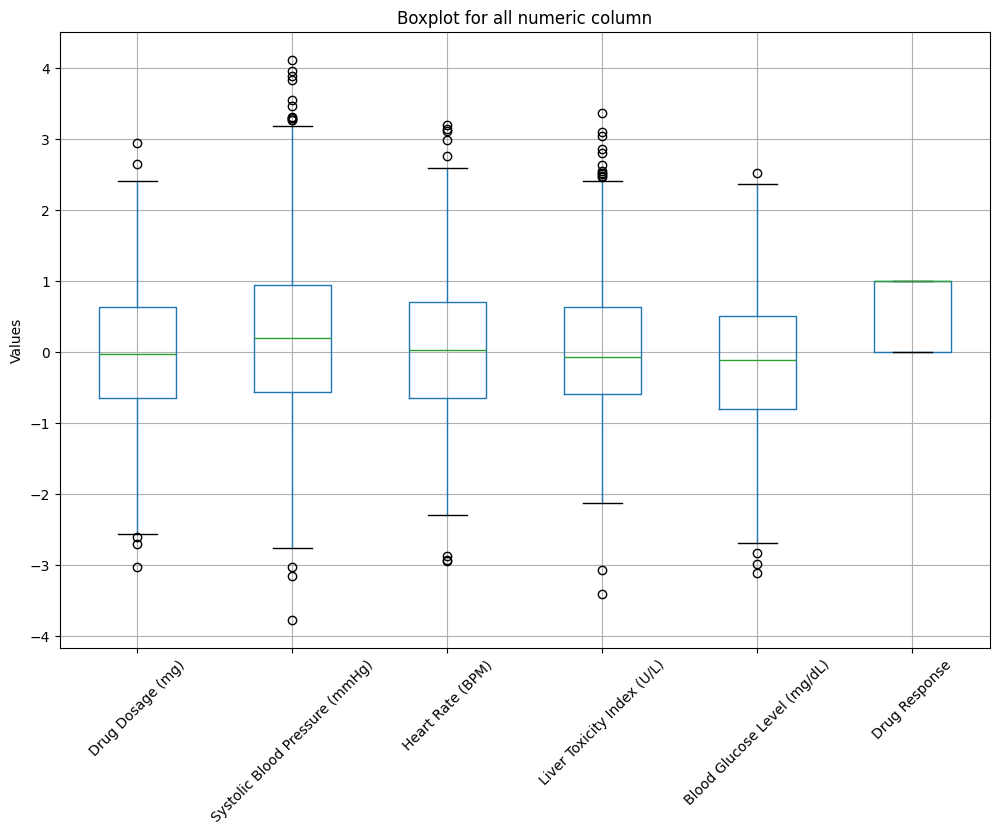

In [19]:
df.boxplot(figsize=(12,8))
plt.title("Boxplot for all numeric column")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


In [40]:
numeric_cols

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [41]:
#capping of outliers

In [47]:
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(
        lambda x: lower_limit if x < lower_limit 
        else upper_limit if x > upper_limit 
        else x
    )

# Apply outlier capping to all numeric columns
for column in df.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(df, column)

In [50]:
df.shape

(500, 6)

In [ ]:
#After outlier capping the boxplot

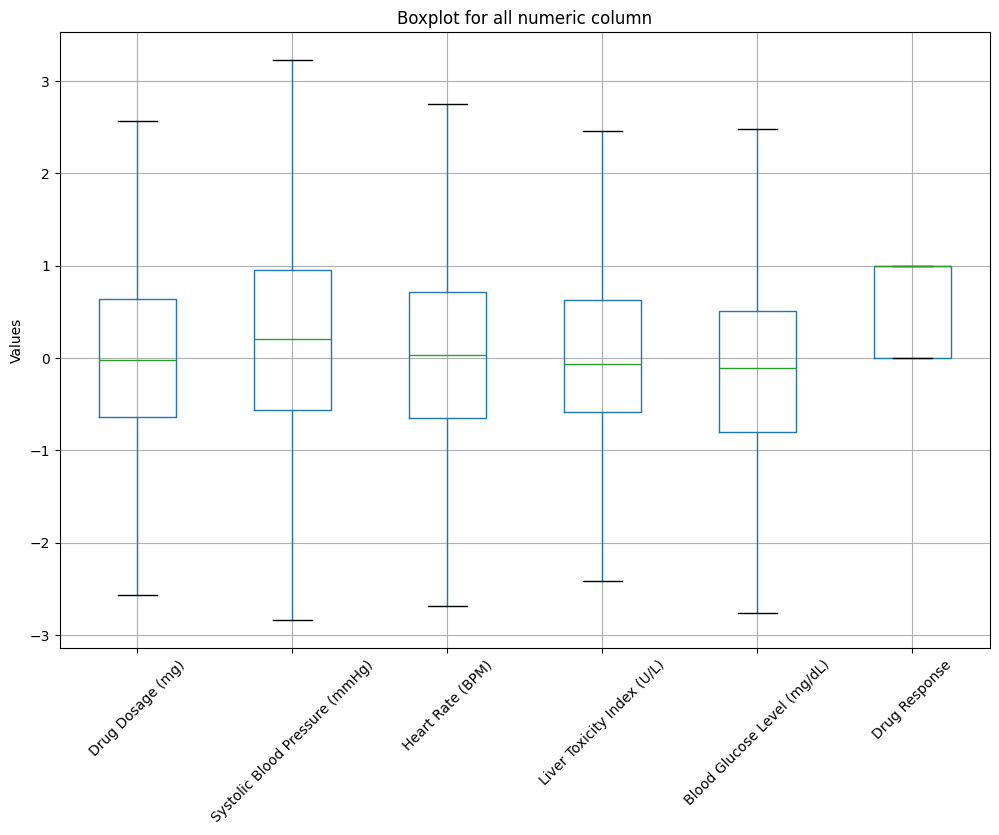

In [51]:
df.boxplot(figsize=(12,8))
plt.title("Boxplot for all numeric column")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [52]:
#Density plot 

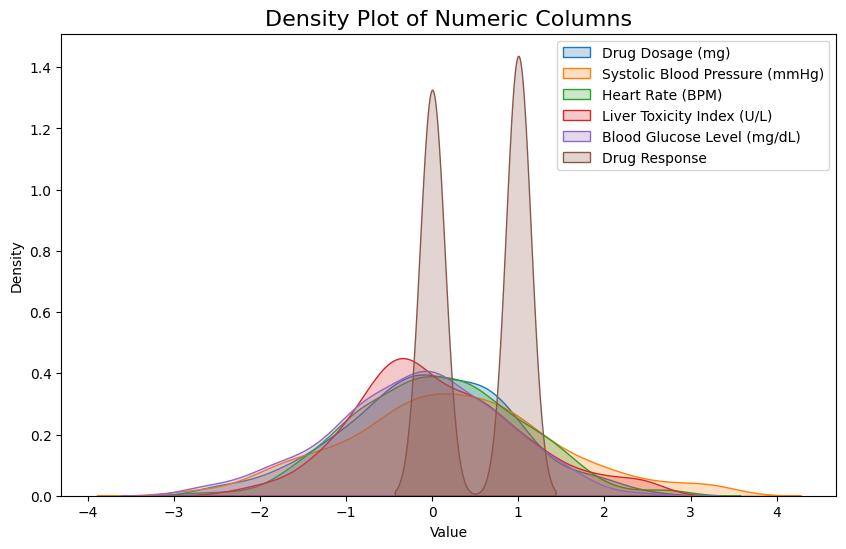

In [53]:
plt.figure(figsize=(10, 6))
for col in numeric_cols:
    sns.kdeplot(df[col], fill=True, label=col)

plt.title("Density Plot of Numeric Columns", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [54]:
# Calculate correlation for numeric columns only
corr = df.corr(numeric_only=True)

In [57]:
print(corr)

                                Drug Dosage (mg)  \
Drug Dosage (mg)                        1.000000   
Systolic Blood Pressure (mmHg)          0.087760   
Heart Rate (BPM)                        0.040512   
Liver Toxicity Index (U/L)              0.128059   
Blood Glucose Level (mg/dL)             0.010070   
Drug Response                           0.043340   

                                Systolic Blood Pressure (mmHg)  \
Drug Dosage (mg)                                      0.087760   
Systolic Blood Pressure (mmHg)                        1.000000   
Heart Rate (BPM)                                     -0.041466   
Liver Toxicity Index (U/L)                            0.273864   
Blood Glucose Level (mg/dL)                           0.041263   
Drug Response                                         0.308012   

                                Heart Rate (BPM)  Liver Toxicity Index (U/L)  \
Drug Dosage (mg)                        0.040512                    0.128059   
Systolic Blo

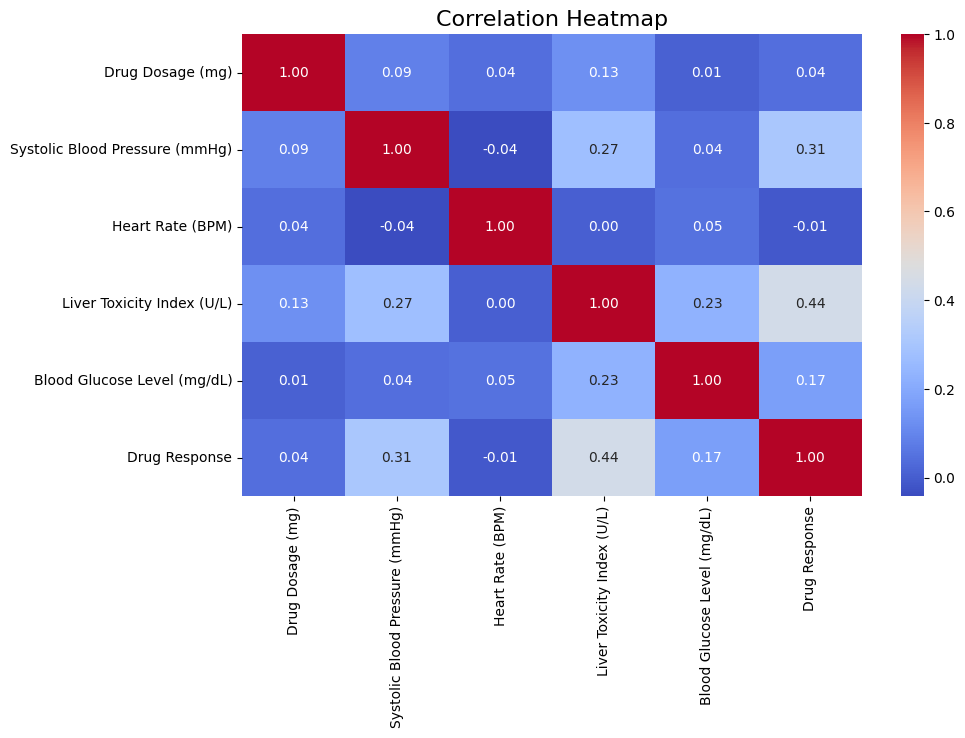

In [58]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
""" 
Task 2: Data Preprocessing
1.Encode categorical variables if necessary.
2.Split the dataset into training and testing sets.
"""

In [59]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.463913,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [ ]:
# There is no need to perform encoding in this data set

In [ ]:
#Splitting the data set into training and testing sets

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug Response', axis=1)   # features
y = df['Drug Response']                # target variable

# Split the dataset: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [79]:
X_train.shape

(350, 5)

In [80]:
X_test.shape

(150, 5)

In [ ]:
"" SVM Implementation
1.Implement a basic SVM classifier using Python libraries like scikit-learn.
2.Train the SVM model on the training data.
3.Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).""

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [82]:
# 3) Build a pipeline: scale -> SVM (RBF kernel)
clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma="scale", probability=False, random_state=42))
])


In [83]:
# 4) Train
clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [90]:
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    ConfusionMatrixDisplay, classification_report )

# Acurracy
acc = accuracy_score(y_test, y_pred)

# Precision
prec = precision_score(y_test, y_pred, average='weighted')

# Recall
rec = recall_score(y_test, y_pred, average='weighted')

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

In [91]:
print(f" Accuracy:  {acc:.2f}")
print(f" Precision: {prec:.2f}")
print(f" Recall:    {rec:.2f}")
print(f" F1-score:  {f1:.2f}")

 Accuracy:  0.78
 Precision: 0.79
 Recall:    0.78
 F1-score:  0.78


In [87]:
#  Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78        69
           1       0.83      0.74      0.78        81

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.79      0.78      0.78       150



In [ ]:
# Visualize classification results on the testing data.

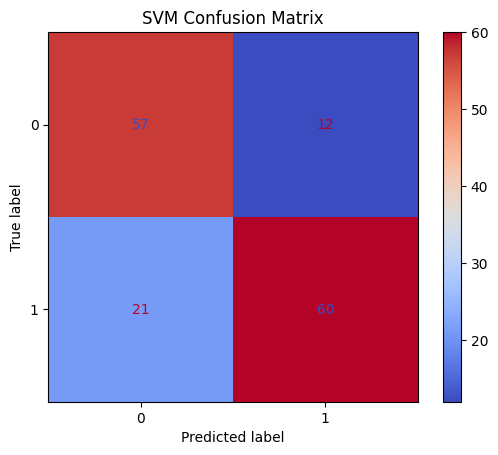

In [88]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='coolwarm')
plt.title("SVM Confusion Matrix")
plt.show()

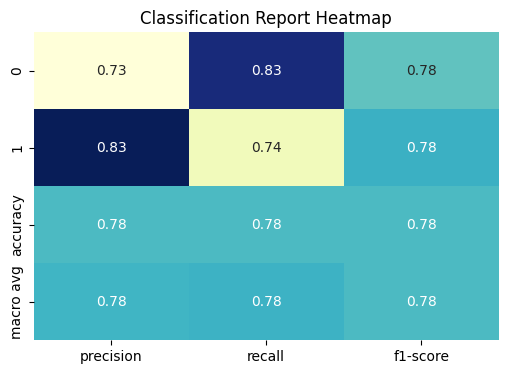

In [92]:
from sklearn.metrics import classification_report

# Generate classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title("Classification Report Heatmap")
plt.show()


In [ ]:
#Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Best params: {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best CV (F1-weighted): 0.7593287688924163
    rank_test_f1_weighted  mean_test_f1_weighted  mean_test_accuracy  \
7                       1               0.759329              0.7600   
13                      2               0.756818              0.7575   
11                      3               0.749863              0.7500   
6                       4               0.749181              0.7500   
4                       5               0.744479              0.7450   
14                      6               0.739669              0.7400   
10                      7               0.734496              0.7350   
19                      8               0.733580              0.7350   
18                      8               0.733580              0.7350   
9                      10               0.733305              0.7350   

    mean_test_precision_weighted  mea

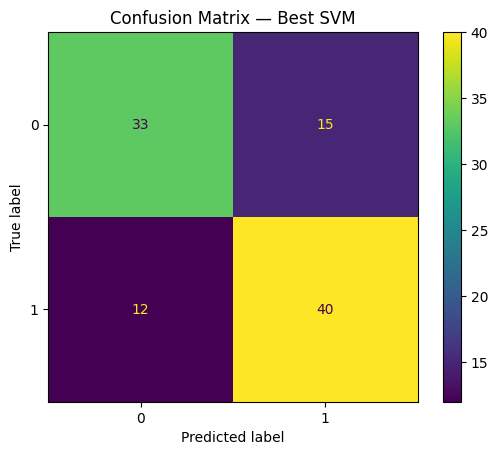

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer
)

#  2) Pipeline: scale - SVM 
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# 3) Hyperparameter search space 

# Different grids per kernel
param_grid = [
    {
        'svm__kernel': ['rbf'],
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': ['scale', 0.01, 0.1, 1]
    },
    {
        'svm__kernel': ['linear'],
        'svm__C': [0.1, 1, 10, 100]
    },
    {
        'svm__kernel': ['poly'],
        'svm__C': [0.1, 1, 10],
        'svm__degree': [2, 3, 4],
        'svm__gamma': ['scale', 0.1]
    }
]

# Weighted F1 is a good default when classes may be imbalanced
scoring = {
    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4) Grid search with CV; refit on best F1-weighted 
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV (F1-weighted):", grid.best_score_)

# Optional: show top results
cv_results = pd.DataFrame(grid.cv_results_)
cols_to_keep = [
    'rank_test_f1_weighted', 'mean_test_f1_weighted', 'mean_test_accuracy',
    'mean_test_precision_weighted', 'mean_test_recall_weighted', 'param_svm__kernel',
    'param_svm__C', 'param_svm__gamma', 'param_svm__degree'
]
display_cols = [c for c in cols_to_keep if c in cv_results.columns]
print(cv_results[display_cols].sort_values('rank_test_f1_weighted').head(10))

# 5) Evaluate on the test set 
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\nTest Accuracy : {acc:.3f}")
print(f"Test Precision: {prec:.3f}")
print(f"Test Recall   : {rec:.3f}")
print(f"Test F1-score : {f1:.3f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix — Best SVM")
plt.show()


In [ ]:
# Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

   Kernel  Accuracy  Precision  Recall  F1-score
0  linear      0.72   0.724541    0.72  0.719664
1    poly      0.66   0.660000    0.66  0.660000
2     rbf      0.77   0.771816    0.77  0.768957


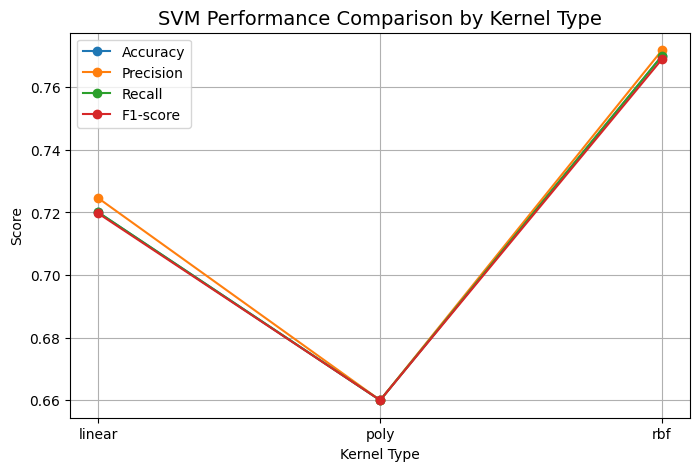

In [98]:
# Test multiple kernels
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel=kernel, C=1.0, gamma='scale', degree=3, random_state=42))
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1   = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

# 3. Display results
results_df = pd.DataFrame(results)
print(results_df)

# 4. Visualization
plt.figure(figsize=(8, 5))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    plt.plot(results_df['Kernel'], results_df[metric], marker='o', label=metric)

plt.title("SVM Performance Comparison by Kernel Type", fontsize=14)
plt.xlabel("Kernel Type")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

In [ ]:
   1.SVM Strengths for This Dataset

a) Handles nonlinear relationships	Your “Drug Response” is influenced by multiple biological measures in complex (nonlinear) ways —
   RBF kernel captures that very well.
b) Performs well with moderate feature scaling	After applying StandardScaler, SVM can easily handle different units like mg/dL and BPM.
c) Robust to overlapping data (soft margin C parameter)	Biological data often overlaps between responder/non-responder groups —
   SVM’s margin tuning (via C) helps find a good balance.
d) Effective in high-dimensional spaces	Even with 5–10 numerical features, SVM can create optimal separating hyperplanes efficiently.
e) Good generalization	Proper kernel and scaling reduce overfitting compared to decision trees or high-degree polynomials.

    2.SVM Weaknesses for This Dataset
    
    Weakness	                      Why It Matters Here
    
 a) Training time	                      If dataset is large (many samples), SVM — especially RBF kernel — can be computationally expensive.
 b) Needs feature scaling	              Features like “Drug Dosage (mg)” and “Liver Toxicity (U/L)” are on very different scales — without normalization, 
                                          SVM performance drops sharply.
 c) Sensitive to outliers	              Outliers in heart rate or toxicity can distort the margin — as seen in your boxplots, they must be treated.
 d) Hyperparameter tuning required  	  Finding the right C and gamma takes time and grid search — wrong values lead to underfitting or overfitting.
 e) Less interpretable	                   SVM decision boundaries are mathematically complex — harder to explain “why” a patient was predicted as
                                           a responder.
️ 
   3.Insights from Visualizations

Visualization	                              Observation	SVM Impact

a) Boxplots	                                 Some features have outliers	SVM margin can be affected — consider capping or scaling
b) Density plots	                          Non-normal, skewed features	RBF kernel can handle this nonlinearity
c) Heatmap	Weak-to-moderate correlations	  Confirms that features are independent enough for SVM to find multi-dimensional boundaries
d) Confusion matrix                           Few misclassifications, mostly near class boundary	Indicates that SVM handled overlap well but
                                              may confuse borderline samples



In [ ]:
Practical Implications of SVM in Real-World -

Healthcare & Medical Diagnosis-
SVMs are used to classify diseases such as cancer, diabetes, and heart disorders using patient health data or medical images.
They help in early detection and accurate diagnosis even with small datasets.
Example: Breast cancer detection using the Wisconsin dataset achieves ~95% accuracy with SVM.

Drug Discovery & Genomics-
In pharmaceutical research, SVMs predict how different compounds interact with biological targets,
helping to identify potential new drugs or genetic markers for diseases.

Finance & Fraud Detection
Banks use SVMs for credit scoring and fraud detection. The model classifies transactions or applicants as legitimate
or fraudulent based on transaction history and customer behavior.

Text and Email Classification (NLP)
SVMs are widely used for spam email detection, sentiment analysis, and document categorization. 
They perform exceptionally well on high-dimensional text data such as TF-IDF vectors.

Image and Object Recognition
SVMs classify image regions (e.g., face vs. non-face, digit recognition, or product defect identification). 
They are commonly used in OpenCV, biometric systems, and industrial inspection.

Manufacturing & Quality Control
In smart factories, SVMs detect machine faults and classify products as defective or non-defective 
using sensor or image data, improving production efficiency and safety.

Environmental and Agricultural Monitoring
SVMs classify weather conditions, detect crop diseases from leaf images, and predict pollution 
levels using nonlinear environmental sensor data.

Transportation & Autonomous Systems
Used in traffic flow prediction, road sign recognition, and pedestrian detection for autonomous vehicles,
helping improve road safety and intelligent transport systems.

